In [72]:
import pandas as pd
import yfinance as yf

In [73]:
start = '2018-01-01'
end = '2021-01-01'

In [74]:
data = yf.download('CL=F PTTEP.BK', start=start, end=end, periods=1)

[*********************100%***********************]  2 of 2 completed


In [75]:
df = data['Adj Close'].copy()

In [76]:
df.isnull().sum(0)

CL=F        23
PTTEP.BK    47
dtype: int64

In [77]:
df.isnull().sum(1)

Date
2018-01-02    1
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2020-12-25    1
2020-12-28    0
2020-12-29    0
2020-12-30    0
2020-12-31    1
Length: 779, dtype: int64

In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum(0)

CL=F        0
PTTEP.BK    0
dtype: int64

In [80]:
df

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,82.333687
2018-01-04,62.009998,85.983932
2018-01-05,61.439999,86.795113
2018-01-08,61.730000,85.578354
2018-01-09,62.959999,86.795113
...,...,...
2020-12-23,48.119999,89.176292
2020-12-24,48.230000,89.644409
2020-12-28,47.619999,88.942238


### Crisis Period Elimination

<AxesSubplot:xlabel='Date'>

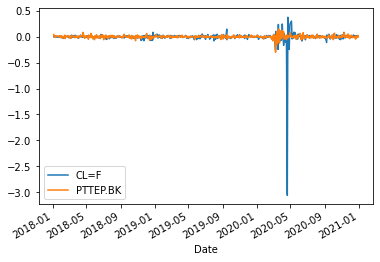

In [81]:
df.pct_change().plot()

In [82]:
df_ret = df.pct_change()

<AxesSubplot:xlabel='Date'>

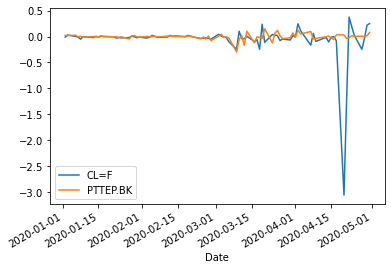

In [83]:
df_ret.loc['2020-01-01':'2020-05-01'].plot()

<AxesSubplot:xlabel='Date'>

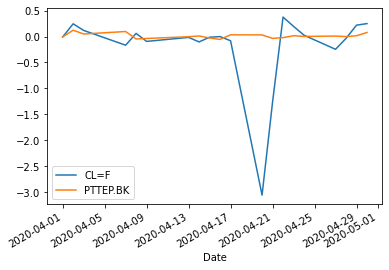

In [84]:
df_ret.loc['2020-04-01':'2020-05-01'].plot()

In [85]:
start_remove = '2020-04-17'
end_remove = '2020-04-22'

In [86]:
df_remove = df_ret.loc[:start_remove].append(df_ret.loc[end_remove:])

In [87]:
df_remove

,CL=F,PTTEP.BK
Date,,
2018-01-03,NaN,NaN
2018-01-04,0.006166,0.044335
2018-01-05,-0.009192,0.009434
2018-01-08,0.004720,-0.014019
2018-01-09,0.019925,0.014218
...,...,...
2020-12-23,0.023394,-0.023077
2020-12-24,0.002286,0.005249
2020-12-28,-0.012648,-0.007833


In [88]:
df_remove.loc['2020-04-15':'2020-04-24']

,CL=F,PTTEP.BK
Date,,
2020-04-15,-0.011934,-0.027950
2020-04-16,0.000000,-0.054313
2020-04-17,-0.080523,0.033784
2020-04-22,0.376623,-0.019672
2020-04-23,0.197388,0.016722
2020-04-24,0.026667,0.003289


<AxesSubplot:xlabel='Date'>

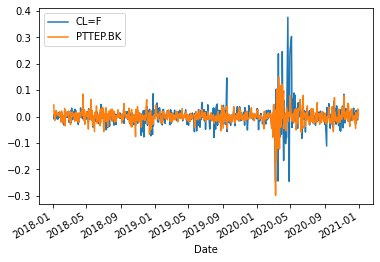

In [89]:
df_remove.plot()

### Standardize

In [90]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

<AxesSubplot:ylabel='Density'>

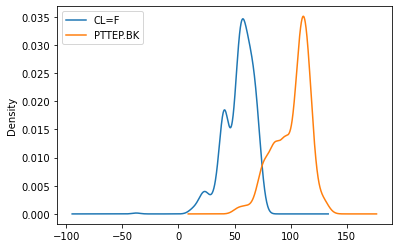

In [138]:
df.plot.kde()

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(df)

StandardScaler()

In [93]:
df_std = scaler.transform(df)

In [94]:
df_std

array([[ 0.5892784 , -1.21068119],
       [ 0.61785737, -0.97941505],
       [ 0.57498862, -0.92802166],
       ...,
       [-0.46439112, -0.7919877 ],
       [-0.43581186, -0.62886808],
       [-0.40572839, -0.59920944]])

In [95]:
df_std = pd.DataFrame(df_std, columns=df.columns)
df_std

,CL=F,PTTEP.BK
0,0.589278,-1.210681
1,0.617857,-0.979415
2,0.574989,-0.928022
3,0.596799,-1.005111
4,0.689305,-0.928022
...,...,...
704,-0.426787,-0.777159
705,-0.418514,-0.747501
706,-0.464391,-0.791988
707,-0.435812,-0.628868


In [96]:
df.mean()

CL=F         53.794725
PTTEP.BK    101.442769
dtype: float64

In [97]:
df.std()

CL=F        13.305778
PTTEP.BK    15.794887
dtype: float64

In [98]:
df_std.describe()

,CL=F,PTTEP.BK
count,7.090000e+02,7.090000e+02
mean,1.936235e-16,-2.647937e-16
std,1.000706e+00,1.000706e+00
min,-6.875905e+00,-3.216018e+00
25%,-6.366181e-01,-7.326714e-01
50%,1.846572e-01,3.444398e-01
75%,7.223973e-01,7.130106e-01
max,1.700858e+00,2.096675e+00


In [99]:
import matplotlib.pyplot as plt

(-3.0, 3.0)

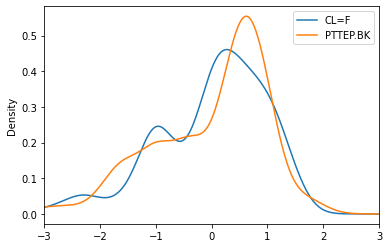

In [100]:
df_std.plot.kde()
plt.xlim(-3,3)

<AxesSubplot:ylabel='Frequency'>

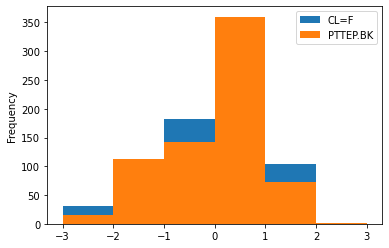

In [101]:
df_std.plot.hist(bins=[-3,-2,-1,0,1,2,3])

In [102]:
outlier_3sd = df_std.loc[~((df_std > 3).any(1) | (df_std < -3).any(1))]

<AxesSubplot:ylabel='Frequency'>

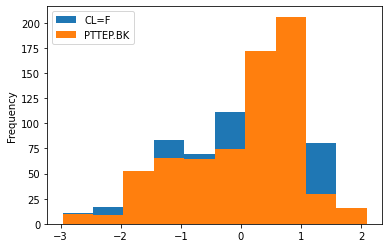

In [103]:
outlier_3sd.plot.hist()

<AxesSubplot:ylabel='Density'>

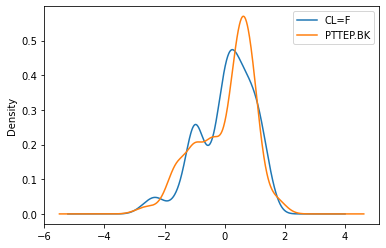

In [104]:
outlier_3sd.plot.kde()

### Robust Scaler

In [105]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [106]:
robustscaler = RobustScaler()

In [107]:
robustscaler.fit(df)

RobustScaler()

In [108]:
df_robust = robustscaler.transform(df)

In [109]:
df_robust

array([[ 0.29773111, -1.07570055],
       [ 0.31876029, -0.91573028],
       [ 0.28721631, -0.8801807 ],
       ...,
       [-0.47758723, -0.78608396],
       [-0.45655784, -0.67325167],
       [-0.43442162, -0.65273634]])

In [110]:
df_robust = pd.DataFrame(df_robust, columns=df.columns)
df_robust

,CL=F,PTTEP.BK
0,0.297731,-1.075701
1,0.318760,-0.915730
2,0.287216,-0.880181
3,0.303265,-0.933505
4,0.371334,-0.880181
...,...,...
704,-0.449917,-0.775827
705,-0.443830,-0.755312
706,-0.477587,-0.786084
707,-0.456558,-0.673252


<AxesSubplot:>

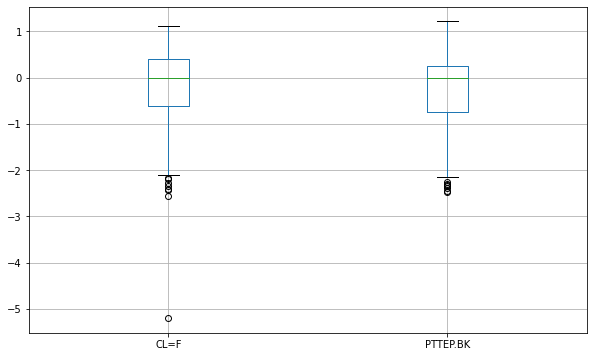

In [111]:
df_robust.boxplot(figsize=(10,6))

(-3.0, 3.0)

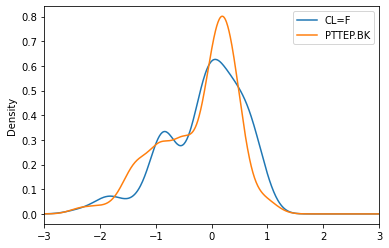

In [112]:
df_robust.plot.kde()
plt.xlim(-3,3)

### Normalized

In [113]:
df_normalized = pd.DataFrame(df, columns=df.columns)

In [114]:
df_normalized

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,82.333687
2018-01-04,62.009998,85.983932
2018-01-05,61.439999,86.795113
2018-01-08,61.730000,85.578354
2018-01-09,62.959999,86.795113
...,...,...
2020-12-23,48.119999,89.176292
2020-12-24,48.230000,89.644409
2020-12-28,47.619999,88.942238


In [115]:
df_normalized.describe()

,CL=F,PTTEP.BK
count,709.000000,709.000000
mean,53.794725,101.442769
std,13.305778,15.794887
min,-37.630001,50.681961
25%,45.330002,89.878471
50%,56.250000,106.879318
75%,63.400002,112.696747
max,76.410004,134.536148


In [116]:
upper = df_normalized.quantile(.95)
upper

CL=F         70.966000
PTTEP.BK    119.821266
Name: 0.95, dtype: float64

In [117]:
lower = df_normalized.quantile(.05)
lower

CL=F        27.19400
PTTEP.BK    73.25921
Name: 0.05, dtype: float64

#### Method 1

In [118]:
high = .95
low = .05

df_normalized_quan = df_normalized.quantile([high,low])

In [119]:
df_normalized_quan

,CL=F,PTTEP.BK
0.95,70.966,119.821266
0.05,27.194,73.259210


In [120]:
filter_df_normalized = df_normalized.apply(lambda x: x[(x <= df_normalized_quan.loc[high, x.name]) & (x >= df_normalized_quan.loc[low,x.name])], axis=0)

In [121]:
filter_df_normalized

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,82.333687
2018-01-04,62.009998,85.983932
2018-01-05,61.439999,86.795113
2018-01-08,61.730000,85.578354
2018-01-09,62.959999,86.795113
...,...,...
2020-12-23,48.119999,89.176292
2020-12-24,48.230000,89.644409
2020-12-28,47.619999,88.942238


In [122]:
filter_df_normalized.dropna()

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,82.333687
2018-01-04,62.009998,85.983932
2018-01-05,61.439999,86.795113
2018-01-08,61.730000,85.578354
2018-01-09,62.959999,86.795113
...,...,...
2020-12-23,48.119999,89.176292
2020-12-24,48.230000,89.644409
2020-12-28,47.619999,88.942238


#### Method 2

In [123]:
Q1 = df_normalized.quantile(.05)
Q3 = df_normalized.quantile(.95)

In [124]:
filter_manual_normal = df_normalized[~((df_normalized < Q1) | (df_normalized > Q3)).any(axis=1)]

In [125]:
filter_manual_normal

,CL=F,PTTEP.BK
Date,,
2018-01-03,61.630001,82.333687
2018-01-04,62.009998,85.983932
2018-01-05,61.439999,86.795113
2018-01-08,61.730000,85.578354
2018-01-09,62.959999,86.795113
...,...,...
2020-12-23,48.119999,89.176292
2020-12-24,48.230000,89.644409
2020-12-28,47.619999,88.942238


### # Min-Max Scaler

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
minmaxscaler = MinMaxScaler()

In [128]:
minmaxscaler.fit(df_normalized)

MinMaxScaler()

In [129]:
df_normal_scaled = minmaxscaler.transform(df_normalized)

In [130]:
df_normal_scaled = pd.DataFrame(df_normal_scaled, columns=df.columns)

In [131]:
df_normal_scaled

,CL=F,PTTEP.BK
0,0.870396,0.377461
1,0.873728,0.420992
2,0.868730,0.430666
3,0.871273,0.416156
4,0.882059,0.430666
...,...,...
704,0.751929,0.459063
705,0.752894,0.464645
706,0.747545,0.456272
707,0.750877,0.486975


<AxesSubplot:>

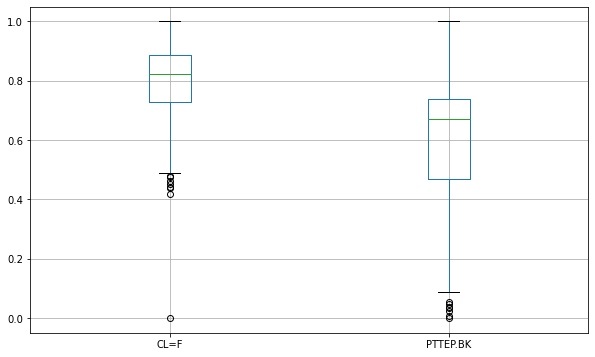

In [132]:
df_normal_scaled.boxplot(figsize=(10,6))

(-0.5, 1.5)

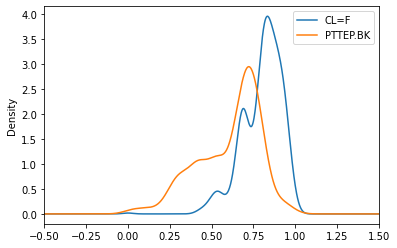

In [133]:
df_normal_scaled.plot.kde()
plt.xlim(-.5,1.5)